In [1]:
import numpy as np 
import torch 
import garch_framework as frame
from garch_framework.layers.losses import CorrectedNLoss
from garch_framework.utils.helpers import generate_ground_data, save_model_params
from garch_framework.utils.datasets import GJRGARCHDataset
from garch_framework.models import GARCHModel, GJRGARCHModel
import matplotlib.pyplot as plt 
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
from torch.utils.data import Dataset
from arch import arch_model

In [2]:
omega=0.2
alpha=0.2
gamma= 0.05
beta=0.5

In [3]:
grounds = [omega, alpha, gamma, beta]

In [4]:
data, volat = generate_ground_data(mode = 'GJRGARCH',omega=omega, alpha=alpha, gamma=gamma,beta=beta, n=10000)

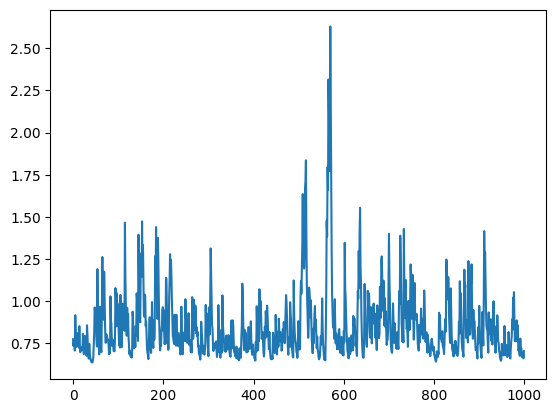

In [5]:
plt.plot(volat[:1000])

In [6]:
dataset= GJRGARCHDataset(data, volat, scale = 100)

In [7]:
for i in range(3):
    print(dataset[i])

(tensor([100.0000,  19.5632,   0.0000,  59.9820]), tensor(50.4577))
(tensor([100.0000,  50.4577,   0.0000,  53.9036]), tensor(51.0602))
(tensor([100.0000,  51.0602,   0.0000,  57.0434]), tensor(3.2979))


In [8]:
model = GJRGARCHModel()
criterion = CorrectedNLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [9]:
dataset[0]

(tensor([100.0000,  19.5632,   0.0000,  59.9820]), tensor(50.4577))

In [10]:
dataset[1]

(tensor([100.0000,  50.4577,   0.0000,  53.9036]), tensor(51.0602))

In [11]:
for i in range(5):
    print(dataset[i])

(tensor([100.0000,  19.5632,   0.0000,  59.9820]), tensor(50.4577))
(tensor([100.0000,  50.4577,   0.0000,  53.9036]), tensor(51.0602))
(tensor([100.0000,  51.0602,   0.0000,  57.0434]), tensor(3.2979))
(tensor([100.0000,   3.2979,   0.0000,  58.7337]), tensor(156.0343))
(tensor([100.0000, 156.0343, 156.0343,  50.0264]), tensor(15.1962))


In [12]:
dl = DataLoader(dataset, batch_size=128, shuffle=False, drop_last=False)

In [13]:
num_epochs = 100

for epochs in tqdm(range(num_epochs), desc="Training"):
    epoch_loss =0.0
    model.train()

    for inputs, resids in dl:
        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output, resids)
        loss.backward()
        optimizer.step()
        
        epoch_loss+=loss.item()

    avg_loss = epoch_loss/len(dl)
    

    
    tqdm.write(f"Epoch {epochs+1}/{num_epochs} | Loss: {avg_loss:.4f} | LR: {optimizer.param_groups[0]['lr']:.2e}")


Training:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100 | Loss: 2.6156 | LR: 1.00e-03
Epoch 2/100 | Loss: 2.6032 | LR: 1.00e-03
Epoch 3/100 | Loss: 2.6006 | LR: 1.00e-03
Epoch 4/100 | Loss: 2.5996 | LR: 1.00e-03
Epoch 5/100 | Loss: 2.5991 | LR: 1.00e-03
Epoch 6/100 | Loss: 2.5989 | LR: 1.00e-03
Epoch 7/100 | Loss: 2.5988 | LR: 1.00e-03
Epoch 8/100 | Loss: 2.5987 | LR: 1.00e-03
Epoch 9/100 | Loss: 2.5987 | LR: 1.00e-03
Epoch 10/100 | Loss: 2.5986 | LR: 1.00e-03
Epoch 11/100 | Loss: 2.5986 | LR: 1.00e-03
Epoch 12/100 | Loss: 2.5986 | LR: 1.00e-03
Epoch 13/100 | Loss: 2.5985 | LR: 1.00e-03
Epoch 14/100 | Loss: 2.5985 | LR: 1.00e-03
Epoch 15/100 | Loss: 2.5985 | LR: 1.00e-03
Epoch 16/100 | Loss: 2.5985 | LR: 1.00e-03
Epoch 17/100 | Loss: 2.5985 | LR: 1.00e-03
Epoch 18/100 | Loss: 2.5984 | LR: 1.00e-03
Epoch 19/100 | Loss: 2.5984 | LR: 1.00e-03
Epoch 20/100 | Loss: 2.5984 | LR: 1.00e-03
Epoch 21/100 | Loss: 2.5984 | LR: 1.00e-03
Epoch 22/100 | Loss: 2.5984 | LR: 1.00e-03
Epoch 23/100 | Loss: 2.5984 | LR: 1.00e-03
Epoch 24/100 | Loss:

In [14]:
model_params = model.get_params()

In [15]:
model_params 

array([0.2283812 , 0.166941  , 0.10630337, 0.45024648], dtype=float32)

In [16]:
save_model_params('test_gjrgarch.json', grounds, model_params, model = 'GJRGARCH')